Problem 1.5 (Page 35)
The perceptron learning algorithm works like this: In each iteration $t$, pick a random $(x(t), y(t))$ and compute the 'signal ' $s(t) = w^T(t)x(t)$. If $y(t).s(t)\le 0$, update $w$ by $$
w(t + 1) = w(t) + y(t) · x(t)
$$ One may argue that this algorithm does not take the 'closeness' between $s(t)$ and $y(t)$ into consideration. Let's look at another perceptron learning algorithm: In each iteration, pick a random $(x(t), y(t))$ and compute $s(t)$. If $y(t) · s(t) \le 1$, update $w$ by $$
w(t + 1) = w(t) + \eta (y(t)-s(t)).x(t)
$$ where $\eta$ is a constant. That is, if $s(t)$ agrees with $y(t)$ well (their product is > 1), the algorithm does nothing. On the other hand, if $s(t)$ is further from $y(t)$, the algorithm changes $w(t)$ more. In this problem , you are asked to implement this algorithm and study its perfrmance.
(a) Generate a training data set of size 100 similar to that used in Exercise 1.4.Generate a test data set of size 10, 000 from the same process. To get $g$, run the algorithm above with $\eta = 100$ on the training data set, until a maximum of 1,000 updates has been reached. Plot the training data set, the target function f, and the final hypothesis g on the same figure. Report the error on the test set.
(b) Use the data set in (a) and redo everything with $\eta = 1$.
(c) Use the data set in (a) and redo everything with $\eta = 0.01$.
(d) Use the data set in (a) and redo everything with $\eta = 0.0001$.
(e) Compare the results that you get from (a) to (d) .
The algorithm above is a variant of the so called Adaline ($Adaptive Linear
Neuron$) algorithm for perceptron learning.

In [4]:
# -*- coding: utf-8 -*-
import random
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

#定义函数GenerateData(n,low,up,w),生成n组数据，每个分量的下界为low,上界为up,w为目标直线
def GenerateData(n,low,up,w):
    m = len(w)
    data=[]
    X1=np.array([])
    Y1=np.array([])
    X2=np.array([])
    Y2=np.array([])
    while(len(data)<n):
        x=np.array(1)
        x=np.append(x,np.random.uniform(low,up,size=m-1))
        if(x.dot(w)>=0.1):
            X1=np.append(X1,x[1])
            Y1=np.append(Y1,x[2])
            x=np.append(x,1)
        elif(x.dot(w)<=-0.1):
            X2=np.append(X2,x[1])
            Y2=np.append(Y2,x[2])
            x=np.append(x,-1)
        data.append(np.array(x))
    return data,X1,Y1,X2,Y2

#定义函数Adaline(n,m,k,w0,low,up,iteration=1000)，n组训练数据，m组测试数据，参数为k,w0为目标函数，iteration为迭代次数,
#数据每个分量下界为low,上界为up
def Adaline(n,m,k,w0,low,up,iteration=1000):
    d=len(w0)
    #首先生成n组训练数据
    data,X1,Y1,X2,Y2=GenerateData(n,low,up,w0)
    #再生成测试数据集
    test=GenerateData(m,low,up,w0)[0]
    
    #定义sign函数
    def sign(x):
        if x>=0:
            return 1
        else:
            return -1
        
    #定义判别函数，用来判断所有数据是否分类完成
    def Judge(x,w):
        flag=1
        for i in x:
            if sign(i[:d].dot(w))*i[-1]<0:
                flag=0
                break
        return flag
    
    #记录次数
    T=0
    #初始化w，注意这里不能初始化为0向量
    w=np.ones(d)
    while(Judge(data,w)==0 and T<iteration):
        i=data[random.randint(0,n-1)]
        s=i[:d].dot(w)
        a=s*i[-1]
        if a<=1:
            w+=k*(i[-1]-s)*i[:d]
            T+=1
        
    #计算错误率
    error=0
    for i in test:
        if sign(i[:3].dot(w))*i[-1]<0:
            error+=1
    print("n为"+str(k)+"时错误率为"+str(error/m))
    
    #直线方程为w0+w1*x+w2*y=0,根据此生成点
    X3=np.arange(low,up,0.01)
    Y3=np.array([(X3[i]*w[1]+w[0])/(-w[2]) for i in range(len(X3))])

    #目标函数
    X4=np.arange(low,up,0.01)
    Y4=np.array([(X3[i]*w0[1]+w0[0])/(-w0[2]) for i in range(len(X4))])

    #画出图片
    plt.scatter(X1,Y1,c='r',s=1)
    plt.scatter(X2,Y2,c='b',s=1)
    plt.plot(X3,Y3,label="("+str(w[0])+")+("+str(w[1])+")x+("+str(w[2])+")y=0")
    plt.plot(X4,Y4,label="("+str(w0[0])+")+("+str(w0[1])+")x+("+str(w0[2])+")y=0")
    plt.title(u"经过"+str(T)+u"次迭代")
    #设置坐标范围
    #plt.xticks(np.arange(0,10))
    #plt.yticks(np.arange(0,10))
    plt.legend()
    plt.show()

n为1时错误率为0.0384


/Users/wang/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


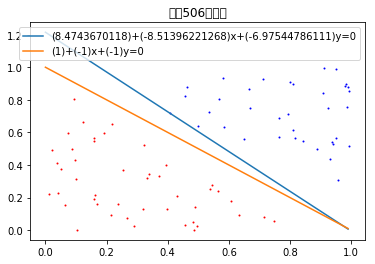

In [5]:
Adaline(100,10000,1,np.array([1,-1,-1]),0,1)

n为0.01时错误率为0.1308


/Users/wang/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


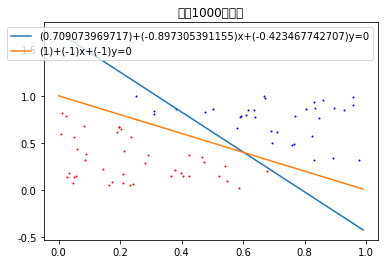

In [6]:
Adaline(100,10000,0.01,np.array([1,-1,-1]),0,1)

n为0.0001时错误率为0.4049


/Users/wang/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


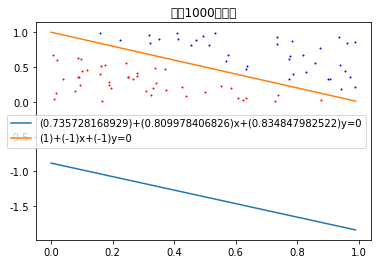

In [7]:
Adaline(100,10000,0.0001,np.array([1,-1,-1]),0,1)

n为0.0001时错误率为0.4061


/Users/wang/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


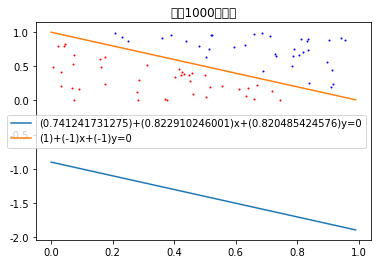

In [9]:
Adaline(100,10000,0.0001,np.array([1,-1,-1]),0,1)